In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import random
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movies_clean.xlsx to movies_clean.xlsx


In [ ]:
#read my excel file into a dataframe
df = pd.read_excel('movies_clean.xlsx')

#show all columns
pd.set_option('display.max_columns', None)

df.head()

,Unnamed: 0,Movie Name,Release Date,Production Budget (USD),Domestic Gross (USD),Opening Weekend (USD),Video Release,Running Time (minutes),Release Month,MPAA_NC-17,MPAA_Not Rated,MPAA_PG,MPAA_PG-13,MPAA_R,Franchise_28 Days Later,Franchise_300,Franchise_47 Meters Down,Franchise_A Dog’s Purpose,Franchise_A Haunted House,Franchise_A Quiet Place,Franchise_Agent Cody Banks,Franchise_Alice in Wonderland,Franchise_Alien,Franchise_Alvin and the Chipmunks,Franchise_American Pie,Franchise_An Inconvenient Truth,Franchise_Anchorman,Franchise_Angry Birds,Franchise_Ant-ManMarvel Cinematic Universe,Franchise_Arthur and the Minimoys,Franchise_Atlas Shrugged,Franchise_Avatar,Franchise_Baahubali,Franchise_Bad Boys,Franchise_Bad Moms,Franchise_Bad Santa,Franchise_Barbershop,Franchise_Batman,Franchise_BatmanDark Knight Trilogy,Franchise_BatmanJoker,Franchise_Before Sunrise,Franchise_Best Exotic Marigold Hotel,Franchise_Big Momma's House,Franchise_Blade,Franchise_Blair Witch Project,Franchise_Boondock Saints,Franchise_Bourne,Franchise_Bridget Jones,Franchise_Bruce Almighty,Franchise_Captain AmericaMarvel Cinematic Universe,Franchise_Cars,Franchise_Cats and Dogs,Franchise_Charlie and the Chocolate Factory,Franchise_Charlie's Angels,Franchise_Cheaper by the Dozen,Franchise_Chronicles of Narnia,Franchise_Clash of the Titans,Franchise_Cloudy with a Chance of Meatballs,Franchise_Cloverfield,Franchise_Crank,Franchise_DC Extended Universe,Franchise_DC Extended UniverseAquaman,Franchise_DC Extended UniverseShazam,Franchise_Da Vinci Code,Franchise_Daddy Day Care,Franchise_Daddy’s Home,Franchise_Dark Universe,Franchise_Despicable Me,Franchise_Despicable MeMinions,Franchise_Diary of a Wimpy Kid,Franchise_Die Hard,Franchise_Dolphin Tale,Franchise_Don’t Breathe,Franchise_Dumb and Dumber,Franchise_Dune,Franchise_Escape Room,Franchise_Exorcist,Franchise_Fantastic Four,Franchise_Fast and the Furious,Franchise_Fifty Shades of Grey,Franchise_Final Destination,Franchise_Finding Nemo,Franchise_Friday,Franchise_Friday the 13th,Franchise_Frozen,Franchise_G.I. Joe,Franchise_Garfield,Franchise_Garry Marshall's Holiday Franchise,Franchise_George A. Romero's Dead Series,Franchise_Ghost Rider,Franchise_Ghostbusters,Franchise_Gladiator,Franchise_Gnomeo and Juliet,Franchise_Godzilla,Franchise_GodzillaKing KongMonsterVerse,Franchise_GodzillaMonsterVerse,Franchise_God’s Not Dead,Franchise_Goosebumps,Franchise_Grown Ups,Franchise_Grudge,Franchise_Halloween,Franchise_Hangover,Franchise_Hannibal Lecter,Franchise_Happy Death Day,Franchise_Happy Feet,Franchise_Harold & Kumar,Franchise_Harry Potter,Franchise_Harry PotterFantastic Beasts and Where to Find Them,Franchise_Has Fallen,Franchise_Hellboy,Franchise_Hills Have Eyes,Franchise_Hitman: Agent 47,Franchise_Hoodwinked,Franchise_Horrible Bosses,Franchise_Hostel,Franchise_Hot Tub Time Machine,Franchise_Hotel Transylvania,"Franchise_House of 1,000 Corpses",Franchise_How to Train Your Dragon,Franchise_Hunger Games,Franchise_I Can Only Imagine,Franchise_Ice Age,Franchise_Indiana Jones,Franchise_Inside Out,Franchise_Insidious,Franchise_Iron ManMarvel Cinematic Universe,Franchise_It,Franchise_Jack Reacher,Franchise_Jack Ryan,Franchise_Jackass,Franchise_James Bond,Franchise_Jeepers Creepers,Franchise_John Wick,Franchise_Johnny English,Franchise_Jumanji,Franchise_Jurassic Park,Franchise_Kenneth Branagh's Hercule Poirot,Franchise_Kick-Ass,Franchise_Kill Bill,Franchise_Kingsman,Franchise_Kung Fu Panda,Franchise_Lara Croft,Franchise_Legally Blonde,Franchise_Lego,Franchise_Machete,Franchise_Mad Max,Franchise_Madagascar,Franchise_Madea Cinematic Universe,Franchise_Magic Mike,Franchise_Maleficent,Franchise_Mamma Mia,Franchise_Marvel Cinematic Universe,Franchise_Marvel Cinematic UniverseAvengers,Franchise_Marvel Cinematic UniverseBlack Panther,Franchise_Marvel Cinematic UniverseDoctor Strange,Franchise_Marvel Cinematic UniverseGuardians of the Galaxy,Franchise_Matrix,Franchise_Meet the Parents,Franchise_Men in Black,Franchise_Millennium (English)

In [ ]:
df = df.dropna()


In [ ]:
random.seed(42)
np.random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

#Model 1 – Logistic Regression for Classification – Successful (2.5x) or Not

Model 1) Logistic Regression predicting movie success

In [ ]:
df['successful'] = df['Domestic Gross (USD)'] >= 1.725 * df['Production Budget (USD)']



<ipython-input-6-8ba6ce1169cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['successful'] = df['Domestic Gross (USD)'] >= 1.725 * df['Production Budget (USD)']


In [ ]:
df.head()

,Unnamed: 0,Movie Name,Release Date,Production Budget (USD),Domestic Gross (USD),Opening Weekend (USD),Video Release,Running Time (minutes),Release Month,MPAA_NC-17,MPAA_Not Rated,MPAA_PG,MPAA_PG-13,MPAA_R,Franchise_28 Days Later,Franchise_300,Franchise_47 Meters Down,Franchise_A Dog’s Purpose,Franchise_A Haunted House,Franchise_A Quiet Place,Franchise_Agent Cody Banks,Franchise_Alice in Wonderland,Franchise_Alien,Franchise_Alvin and the Chipmunks,Franchise_American Pie,Franchise_An Inconvenient Truth,Franchise_Anchorman,Franchise_Angry Birds,Franchise_Ant-ManMarvel Cinematic Universe,Franchise_Arthur and the Minimoys,Franchise_Atlas Shrugged,Franchise_Avatar,Franchise_Baahubali,Franchise_Bad Boys,Franchise_Bad Moms,Franchise_Bad Santa,Franchise_Barbershop,Franchise_Batman,Franchise_BatmanDark Knight Trilogy,Franchise_BatmanJoker,Franchise_Before Sunrise,Franchise_Best Exotic Marigold Hotel,Franchise_Big Momma's House,Franchise_Blade,Franchise_Blair Witch Project,Franchise_Boondock Saints,Franchise_Bourne,Franchise_Bridget Jones,Franchise_Bruce Almighty,Franchise_Captain AmericaMarvel Cinematic Universe,Franchise_Cars,Franchise_Cats and Dogs,Franchise_Charlie and the Chocolate Factory,Franchise_Charlie's Angels,Franchise_Cheaper by the Dozen,Franchise_Chronicles of Narnia,Franchise_Clash of the Titans,Franchise_Cloudy with a Chance of Meatballs,Franchise_Cloverfield,Franchise_Crank,Franchise_DC Extended Universe,Franchise_DC Extended UniverseAquaman,Franchise_DC Extended UniverseShazam,Franchise_Da Vinci Code,Franchise_Daddy Day Care,Franchise_Daddy’s Home,Franchise_Dark Universe,Franchise_Despicable Me,Franchise_Despicable MeMinions,Franchise_Diary of a Wimpy Kid,Franchise_Die Hard,Franchise_Dolphin Tale,Franchise_Don’t Breathe,Franchise_Dumb and Dumber,Franchise_Dune,Franchise_Escape Room,Franchise_Exorcist,Franchise_Fantastic Four,Franchise_Fast and the Furious,Franchise_Fifty Shades of Grey,Franchise_Final Destination,Franchise_Finding Nemo,Franchise_Friday,Franchise_Friday the 13th,Franchise_Frozen,Franchise_G.I. Joe,Franchise_Garfield,Franchise_Garry Marshall's Holiday Franchise,Franchise_George A. Romero's Dead Series,Franchise_Ghost Rider,Franchise_Ghostbusters,Franchise_Gladiator,Franchise_Gnomeo and Juliet,Franchise_Godzilla,Franchise_GodzillaKing KongMonsterVerse,Franchise_GodzillaMonsterVerse,Franchise_God’s Not Dead,Franchise_Goosebumps,Franchise_Grown Ups,Franchise_Grudge,Franchise_Halloween,Franchise_Hangover,Franchise_Hannibal Lecter,Franchise_Happy Death Day,Franchise_Happy Feet,Franchise_Harold & Kumar,Franchise_Harry Potter,Franchise_Harry PotterFantastic Beasts and Where to Find Them,Franchise_Has Fallen,Franchise_Hellboy,Franchise_Hills Have Eyes,Franchise_Hitman: Agent 47,Franchise_Hoodwinked,Franchise_Horrible Bosses,Franchise_Hostel,Franchise_Hot Tub Time Machine,Franchise_Hotel Transylvania,"Franchise_House of 1,000 Corpses",Franchise_How to Train Your Dragon,Franchise_Hunger Games,Franchise_I Can Only Imagine,Franchise_Ice Age,Franchise_Indiana Jones,Franchise_Inside Out,Franchise_Insidious,Franchise_Iron ManMarvel Cinematic Universe,Franchise_It,Franchise_Jack Reacher,Franchise_Jack Ryan,Franchise_Jackass,Franchise_James Bond,Franchise_Jeepers Creepers,Franchise_John Wick,Franchise_Johnny English,Franchise_Jumanji,Franchise_Jurassic Park,Franchise_Kenneth Branagh's Hercule Poirot,Franchise_Kick-Ass,Franchise_Kill Bill,Franchise_Kingsman,Franchise_Kung Fu Panda,Franchise_Lara Croft,Franchise_Legally Blonde,Franchise_Lego,Franchise_Machete,Franchise_Mad Max,Franchise_Madagascar,Franchise_Madea Cinematic Universe,Franchise_Magic Mike,Franchise_Maleficent,Franchise_Mamma Mia,Franchise_Marvel Cinematic Universe,Franchise_Marvel Cinematic UniverseAvengers,Franchise_Marvel Cinematic UniverseBlack Panther,Franchise_Marvel Cinematic UniverseDoctor Strange,Franchise_Marvel Cinematic UniverseGuardians of the Galaxy,Franchise_Matrix,Franchise_Meet the Parents,Franchise_Men in Black,Franchise_Millennium (English)

In [ ]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection   import GridSearchCV, StratifiedKFold
from sklearn.preprocessing     import StandardScaler
from sklearn.pipeline          import Pipeline


Model 1: Logistic Regression for Classification

In [ ]:
x = df.drop(columns=['successful', 'Movie Name', 'Domestic Gross (USD)'])
y = df['successful']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=123)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
# 2) Scale features
x_train_numeric = x_train.select_dtypes(include=[np.number])
x_test_numeric = x_test.select_dtypes(include=[np.number])

scaler = StandardScaler().fit(x_train_numeric)
x_train_scaled = scaler.transform(x_train_numeric)
x_test_scaled  = scaler.transform(x_test_numeric)

# 3) Instantiate & fit LogisticRegression with C=10
lg_model = LogisticRegression(
    C=10,
    penalty='l1',
    solver='saga',     # saga handles L1 efficiently
    max_iter=1000,
    random_state=123
)
lg_model.fit(x_train_scaled, y_train)

# 4) Predict & evaluate
y_proba = lg_model.predict_proba(x_test_scaled)[:, 1]
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))

# calculate precision and recall
y_pred = lg_model.predict(x_test_scaled)
precision = precision_score(y_test,  y_pred)
recall = recall_score(y_test,  y_pred)
print("Precision:", round(precision,3))
print("Recall:", round(recall,3))


Test ROC-AUC: 0.8927441662529257
Precision: 0.816
Recall: 0.635


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


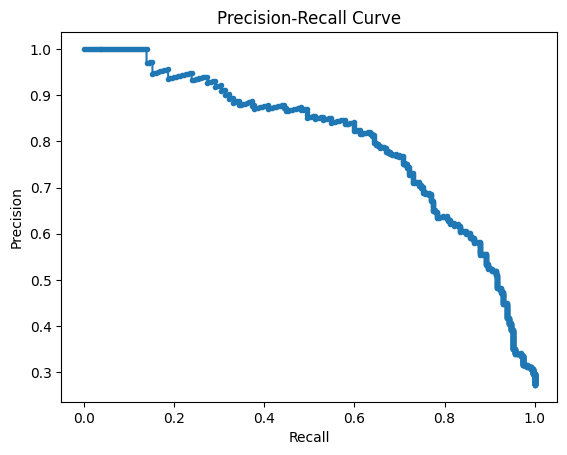

In [ ]:
#create a precision recall curve for the Logistic Regression Model
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

#plot curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

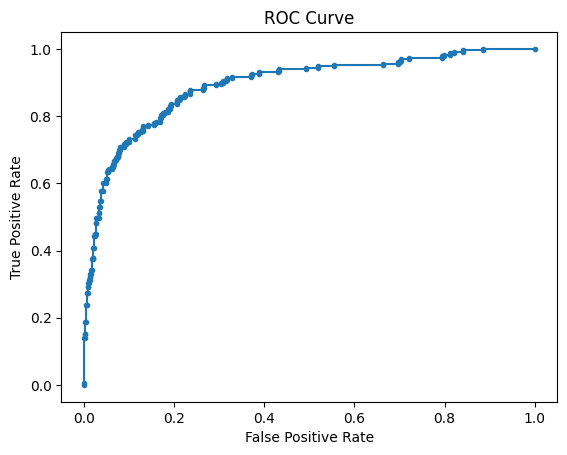

In [ ]:
#create an auc curve for the Logistic Regression Model
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

#plot curve
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#Model 2 – Linear Regression with Lasso – Domestic Gross (USD) Prediction

Model 2) Linear Regression with Lasso to predict DomGross

In [ ]:
X = df.select_dtypes(include=[np.number]).drop(columns=['Domestic Gross (USD)'])
y = df['Domestic Gross (USD)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)



In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)

lasso = Lasso(max_iter=10000)
param_grid_reg = {'alpha': np.logspace(-2, 2, 5)}

grid_reg = GridSearchCV(
    lasso, param_grid_reg, scoring='r2', cv=3
)
grid_reg.fit(X_train_scaled, y_train)

best_alpha = grid_reg.best_params_['alpha']
r2_test = grid_reg.score(X_test_scaled, y_test)
rmse_test = np.sqrt(mean_squared_error(y_test, grid_reg.predict(X_test_scaled)))
#calculate MAE
mae_test = mean_absolute_error(y_test, grid_reg.predict(X_test_scaled))


print(f"Regression → Best alpha: {best_alpha:.4f}, Test R²: {r2_test:.3f}, Test RMSE: {rmse_test:.2f}, Test MAE: {mae_test:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.390e+16, tolerance: 1.448e+15
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.427e+16, tolerance: 1.555e+15
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.390e+16, tolerance: 1.448e

Regression → Best alpha: 100.0000, Test R²: 0.811, Test RMSE: 34359467.06, Test MAE: 17294015.39


#Drop Features < 70


In [ ]:

binary_cols = [col for col in X.columns if set(X[col].unique()).issubset({0,1})]

#Find rare columns
rare_binary_cols = [col for col in binary_cols if X[col].sum() < 70]


X_cleaned = X.drop(columns=rare_binary_cols)

print(f"Dropped {len(rare_binary_cols)} rare binary columns.")
print(f"Remaining features: {X_cleaned.shape[1]}")


Dropped 330 rare binary columns.
Remaining features: 149


#Model 3 – Random Forests 🌴


Model 3 – Balanced Random Forest Classifier – Sucessful or Not

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

X_features_only = pd.get_dummies(
    X_cleaned.drop(columns=['Production Budget (USD)', 'Unnamed: 0']),
    columns=['Release Month'],
    drop_first=False
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features_only)

budget_values = X_cleaned['Production Budget (USD)'].values
y = df.loc[X_cleaned.index, 'successful']

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=123
)

budget_train, budget_test = train_test_split(
    budget_values, stratify=y, test_size=0.2, random_state=42
)

brf_clf = BalancedRandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

brf_clf.fit(X_train, y_train)

y_proba_brf = brf_clf.predict_proba(X_test)[:, 1]

custom_threshold = 0.4
y_pred_thresh = (y_proba_brf >= custom_threshold).astype(int)

print(f"Classification Report (threshold = {custom_threshold}):")
print(classification_report(y_test, y_pred_thresh))
print(f"Test AUC: {roc_auc_score(y_test, y_proba_brf):.3f}")

# Save X_test_df for plotting
X_test_df = pd.DataFrame(X_test, columns=X_features_only.columns)


Classification Report (threshold = 0.4):
              precision    recall  f1-score   support

       False       0.90      0.69      0.78       613
        True       0.49      0.79      0.60       230

    accuracy                           0.72       843
   macro avg       0.69      0.74      0.69       843
weighted avg       0.78      0.72      0.73       843

Test AUC: 0.829


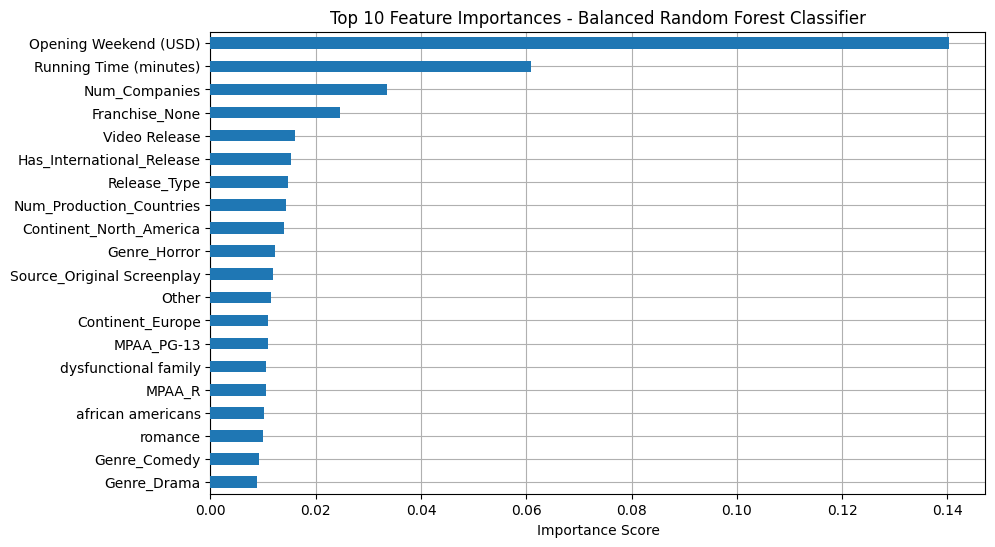

In [ ]:
importances = brf_clf.feature_importances_
feature_names = X.columns


feat_imp = pd.Series(importances, index=X_features_only.columns).sort_values(ascending=False).head(20)


plt.figure(figsize=(10, 6))
feat_imp.plot(kind='barh', zorder=3)
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances - Balanced Random Forest Classifier')
plt.grid(True)
plt.show()

#Sensitivity Analysis BRF

In [ ]:
def feature_sensitivity_plot_classification(model, base_df, feature_name, test_values, scaler, title_suffix=""):
    """
    Plots predicted probability of success as one feature changes (BRF classifier version).
    """
    probabilities = []

    for val in test_values:
        modified = base_df.copy()
        modified[feature_name] = val
        modified_scaled = scaler.transform(modified)
        prob = model.predict_proba(modified_scaled)[:, 1][0]
        probabilities.append(prob)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(test_values, probabilities, marker='o')
    plt.title(f'Effect of {feature_name} on Predicted Success Probability {title_suffix}')
    plt.xlabel(feature_name)
    plt.ylabel('Predicted Success Probability')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return pd.DataFrame({feature_name: test_values, 'Predicted Success Probability': probabilities})


Running Time

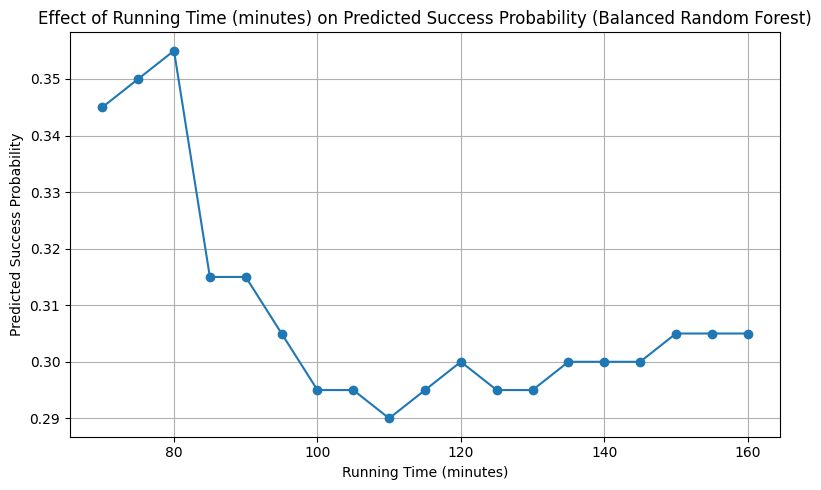

,Running Time (minutes),Predicted Success Probability
0,70,0.345
1,75,0.350
2,80,0.355
3,85,0.315
4,90,0.315
5,95,0.305
6,100,0.295
7,105,0.295
8,110,0.290
9,115,0.295


In [ ]:
# Recreate a representative test row
X_test_df = pd.DataFrame(X_test, columns=X_features_only.columns)
base_example = X_test_df.iloc[[0]].copy()

# Vary runtime from 70 to 160 minutes
runtime_range = np.arange(70, 161, 5)

feature_sensitivity_plot_classification(
    model=brf_clf,
    base_df=base_example,
    feature_name='Running Time (minutes)',
    test_values=runtime_range,
    scaler=scaler,
    title_suffix="(Balanced Random Forest)"
)


In [ ]:
df.head()

,Unnamed: 0,Movie Name,Release Date,Production Budget (USD),Domestic Gross (USD),Opening Weekend (USD),Video Release,Running Time (minutes),Release Month,MPAA_NC-17,MPAA_Not Rated,MPAA_PG,MPAA_PG-13,MPAA_R,Franchise_28 Days Later,Franchise_300,Franchise_47 Meters Down,Franchise_A Dog’s Purpose,Franchise_A Haunted House,Franchise_A Quiet Place,Franchise_Agent Cody Banks,Franchise_Alice in Wonderland,Franchise_Alien,Franchise_Alvin and the Chipmunks,Franchise_American Pie,Franchise_An Inconvenient Truth,Franchise_Anchorman,Franchise_Angry Birds,Franchise_Ant-ManMarvel Cinematic Universe,Franchise_Arthur and the Minimoys,Franchise_Atlas Shrugged,Franchise_Avatar,Franchise_Baahubali,Franchise_Bad Boys,Franchise_Bad Moms,Franchise_Bad Santa,Franchise_Barbershop,Franchise_Batman,Franchise_BatmanDark Knight Trilogy,Franchise_BatmanJoker,Franchise_Before Sunrise,Franchise_Best Exotic Marigold Hotel,Franchise_Big Momma's House,Franchise_Blade,Franchise_Blair Witch Project,Franchise_Boondock Saints,Franchise_Bourne,Franchise_Bridget Jones,Franchise_Bruce Almighty,Franchise_Captain AmericaMarvel Cinematic Universe,Franchise_Cars,Franchise_Cats and Dogs,Franchise_Charlie and the Chocolate Factory,Franchise_Charlie's Angels,Franchise_Cheaper by the Dozen,Franchise_Chronicles of Narnia,Franchise_Clash of the Titans,Franchise_Cloudy with a Chance of Meatballs,Franchise_Cloverfield,Franchise_Crank,Franchise_DC Extended Universe,Franchise_DC Extended UniverseAquaman,Franchise_DC Extended UniverseShazam,Franchise_Da Vinci Code,Franchise_Daddy Day Care,Franchise_Daddy’s Home,Franchise_Dark Universe,Franchise_Despicable Me,Franchise_Despicable MeMinions,Franchise_Diary of a Wimpy Kid,Franchise_Die Hard,Franchise_Dolphin Tale,Franchise_Don’t Breathe,Franchise_Dumb and Dumber,Franchise_Dune,Franchise_Escape Room,Franchise_Exorcist,Franchise_Fantastic Four,Franchise_Fast and the Furious,Franchise_Fifty Shades of Grey,Franchise_Final Destination,Franchise_Finding Nemo,Franchise_Friday,Franchise_Friday the 13th,Franchise_Frozen,Franchise_G.I. Joe,Franchise_Garfield,Franchise_Garry Marshall's Holiday Franchise,Franchise_George A. Romero's Dead Series,Franchise_Ghost Rider,Franchise_Ghostbusters,Franchise_Gladiator,Franchise_Gnomeo and Juliet,Franchise_Godzilla,Franchise_GodzillaKing KongMonsterVerse,Franchise_GodzillaMonsterVerse,Franchise_God’s Not Dead,Franchise_Goosebumps,Franchise_Grown Ups,Franchise_Grudge,Franchise_Halloween,Franchise_Hangover,Franchise_Hannibal Lecter,Franchise_Happy Death Day,Franchise_Happy Feet,Franchise_Harold & Kumar,Franchise_Harry Potter,Franchise_Harry PotterFantastic Beasts and Where to Find Them,Franchise_Has Fallen,Franchise_Hellboy,Franchise_Hills Have Eyes,Franchise_Hitman: Agent 47,Franchise_Hoodwinked,Franchise_Horrible Bosses,Franchise_Hostel,Franchise_Hot Tub Time Machine,Franchise_Hotel Transylvania,"Franchise_House of 1,000 Corpses",Franchise_How to Train Your Dragon,Franchise_Hunger Games,Franchise_I Can Only Imagine,Franchise_Ice Age,Franchise_Indiana Jones,Franchise_Inside Out,Franchise_Insidious,Franchise_Iron ManMarvel Cinematic Universe,Franchise_It,Franchise_Jack Reacher,Franchise_Jack Ryan,Franchise_Jackass,Franchise_James Bond,Franchise_Jeepers Creepers,Franchise_John Wick,Franchise_Johnny English,Franchise_Jumanji,Franchise_Jurassic Park,Franchise_Kenneth Branagh's Hercule Poirot,Franchise_Kick-Ass,Franchise_Kill Bill,Franchise_Kingsman,Franchise_Kung Fu Panda,Franchise_Lara Croft,Franchise_Legally Blonde,Franchise_Lego,Franchise_Machete,Franchise_Mad Max,Franchise_Madagascar,Franchise_Madea Cinematic Universe,Franchise_Magic Mike,Franchise_Maleficent,Franchise_Mamma Mia,Franchise_Marvel Cinematic Universe,Franchise_Marvel Cinematic UniverseAvengers,Franchise_Marvel Cinematic UniverseBlack Panther,Franchise_Marvel Cinematic UniverseDoctor Strange,Franchise_Marvel Cinematic UniverseGuardians of the Galaxy,Franchise_Matrix,Franchise_Meet the Parents,Franchise_Men in Black,Franchise_Millennium (English)

In [ ]:
def month_sensitivity_plot_one_hot_bool(model, base_row, month_column_prefix, scaler):
    months = range(1, 13)
    probs = []

    for month in months:
        row = base_row.copy()

        # Reset all one-hot encoded month dummies to False
        for col in row.columns:
            if col.startswith(month_column_prefix):
                row[col] = False

        # If month > 1, turn on the corresponding dummy
        if month > 1:
            col_name = f"{month_column_prefix}{month}"
            if col_name in row.columns:
                row[col_name] = True
            else:
                continue  # Skip if column not present

        # Scale and predict
        row_scaled = scaler.transform(row)
        prob = model.predict_proba(row_scaled)[:, 1][0]
        probs.append(prob)

    # Plot
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 5))
    plt.plot(months, probs, marker='o')
    plt.title('Effect of Release Month on Predicted Success Probability (BRF)')
    plt.xlabel('Release Month')
    plt.ylabel('Predicted Success Probability')
    plt.xticks(months)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return pd.DataFrame({'Release Month': months, 'Predicted Success Probability': probs})


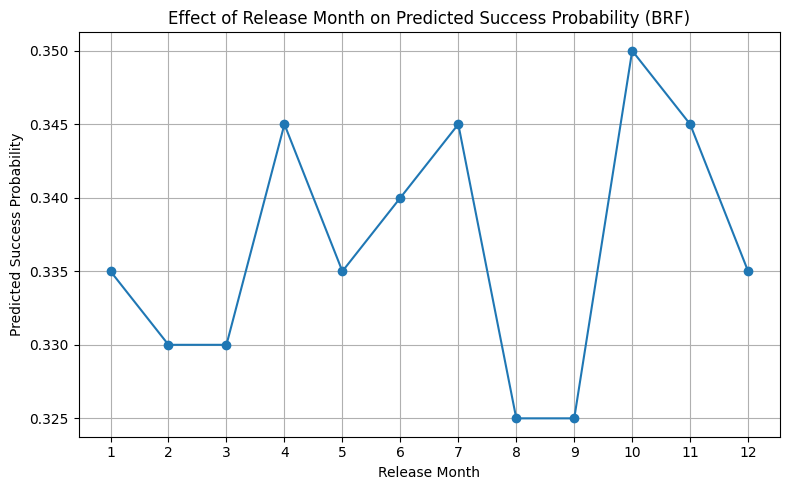

    Release Month  Predicted Success Probability
0               1                          0.335
1               2                          0.330
2               3                          0.330
3               4                          0.345
4               5                          0.335
5               6                          0.340
6               7                          0.345
7               8                          0.325
8               9                          0.325
9              10                          0.350
10             11                          0.345
11             12                          0.335


In [ ]:
base_row = X_test_df.iloc[[0]].copy()

results = month_sensitivity_plot_one_hot_bool(
    model=brf_clf,
    base_row=base_row,
    month_column_prefix='Release Month_',
    scaler=scaler
)

print(results)


**Ensemble Classification Model**

In [ ]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

ensemble_clf = VotingClassifier(estimators=[
            ('brf', brf_clf),
            ('lr', lg_model),
        ],
        voting='soft')

ensemble_clf.fit(X_train, y_train)  # ensure X_train_clf, y_train_clf are defined
y_pred_clf = ensemble_clf.predict(X_test)
y_proba_clf = ensemble_clf.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_clf))
print("Classification AUC:", roc_auc_score(y_test, y_proba_clf))


Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.91      0.87       613
        True       0.68      0.52      0.59       230

    accuracy                           0.80       843
   macro avg       0.75      0.71      0.73       843
weighted avg       0.79      0.80      0.79       843

Classification AUC: 0.8373147031704375


Model 3.2 – Random Forest Regression – Domestic Gross (USD) Prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df.select_dtypes(include=[np.number]).drop(columns=['Domestic Gross (USD)', 'Unnamed: 0'])
y = df['Domestic Gross (USD)']

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_imp = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_cleaned)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
rf_reg = RandomForestRegressor(n_estimators=1000, max_depth=None, random_state=42, max_features='sqrt')
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf_reg)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_reg))

print(f"Random Forest Regression → Test R²: {r2_rf:.3f}, Test RMSE: {rmse_rf:.2f}")


Random Forest Regression → Test R²: 0.790, Test RMSE: 40763166.85


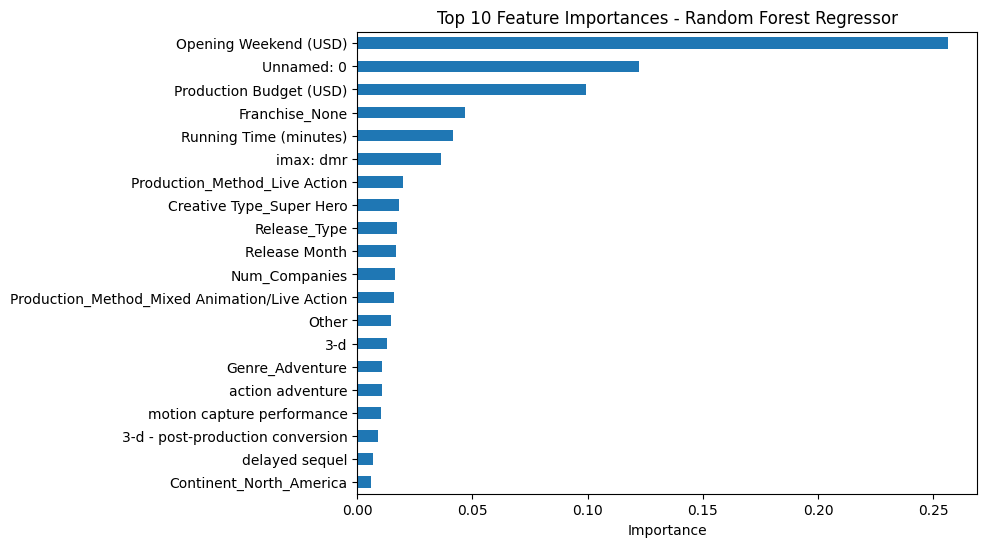

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

importances = rf_reg.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=X_cleaned.columns).sort_values(ascending=False).head(20)

plt.figure(figsize=(8, 6))
feat_imp.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - Random Forest Regressor')
plt.xlabel('Importance')
plt.show()


Model 3.3 – Random Forest Regression (High/Low Budget) – Domestic Gross (USD) Prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


cutoff = 2_000_000  # 2 million dollars cutoff


df['Budget Category'] = df['Production Budget (USD)'].apply(
    lambda x: 'Low Budget' if x <= cutoff else 'High Budget'
)

# Low Budget movies
df_low = df[df['Budget Category'] == 'Low Budget']
X_low = df_low.select_dtypes(include=[np.number]).drop(columns=['Domestic Gross (USD)', 'Unnamed: 0'])
y_low = df_low['Domestic Gross (USD)']

# High Budget movies
df_high = df[df['Budget Category'] == 'High Budget']
X_high = df_high.select_dtypes(include=[np.number]).drop(columns=['Domestic Gross (USD)', 'Unnamed: 0'])
y_high = df_high['Domestic Gross (USD)']

# train/test split for Low Budget
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.2, random_state=42)

# train/test split for High Budget
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.2, random_state=42)

# Random Forest for Low Budget
rf_reg_low = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42
)

rf_reg_low.fit(X_train_low, y_train_low)
y_pred_low = rf_reg_low.predict(X_test_low)

r2_low = r2_score(y_test_low, y_pred_low)
rmse_low = np.sqrt(mean_squared_error(y_test_low, y_pred_low))

print(f"Low Budget Movies → Test R²: {r2_low:.3f}, Test RMSE: {rmse_low:.2f}")

# Random Forest for High Budget
rf_reg_high = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42
)

rf_reg_high.fit(X_train_high, y_train_high)
y_pred_high = rf_reg_high.predict(X_test_high)

r2_high = r2_score(y_test_high, y_pred_high)
rmse_high = np.sqrt(mean_squared_error(y_test_high, y_pred_high))

print(f"High Budget Movies → Test R²: {r2_high:.3f}, Test RMSE: {rmse_high:.2f}")


Low Budget Movies → Test R²: 0.698, Test RMSE: 6317002.14
High Budget Movies → Test R²: 0.868, Test RMSE: 33806087.75


# Low Budget Movies

XG Boost Regressor

In [ ]:
from xgboost import XGBRegressor

xgb_low = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_low.fit(X_train_low, y_train_low)
y_pred_low = xgb_low.predict(X_test_low)

r2_low = r2_score(y_test_low, y_pred_low)
rmse_low = np.sqrt(mean_squared_error(y_test_low, y_pred_low))

print(f"XGBoost → Low Budget Movies → R²: {r2_low:.3f}, RMSE: ${rmse_low:,.2f}")


XGBoost → Low Budget Movies → R²: 0.673, RMSE: $6,574,399.00


Balanced Random Forest Classifier – Sucessful (2.5x) or Not

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

df_low['successful'] = df_low['Domestic Gross (USD)'] >= 1.725 * df_low['Production Budget (USD)']

X_low_class = df_low.drop(columns=['Domestic Gross (USD)', 'Unnamed: 0', 'successful'])

X_low_class = X_low_class.select_dtypes(include=[np.number])

y_low_class = df_low['successful']

X_train_low_class, X_test_low_class, y_train_low_class, y_test_low_class = train_test_split(
    X_low_class, y_low_class, stratify=y_low_class, test_size=0.2, random_state=42
)

brf_low = BalancedRandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    random_state=42
)

brf_low.fit(X_train_low_class, y_train_low_class)
y_proba_brf_low = brf_low.predict_proba(X_test_low_class)[:, 1]


threshold = 0.35
y_pred_thresholded = (y_proba_brf_low >= threshold).astype(int)


print(f"Classification Report (threshold = {threshold}):")
print(classification_report(y_test_low_class, y_pred_thresholded))
print(f"Test AUC: {roc_auc_score(y_test_low_class, y_proba_brf_low):.3f}")


<ipython-input-36-4e5582c7713b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low['successful'] = df_low['Domestic Gross (USD)'] >= 1.725 * df_low['Production Budget (USD)']


Classification Report (threshold = 0.35):
              precision    recall  f1-score   support

       False       0.97      0.64      0.77        47
        True       0.53      0.95      0.68        20

    accuracy                           0.73        67
   macro avg       0.75      0.79      0.72        67
weighted avg       0.84      0.73      0.74        67

Test AUC: 0.918


Important Features – Low Budget Movies

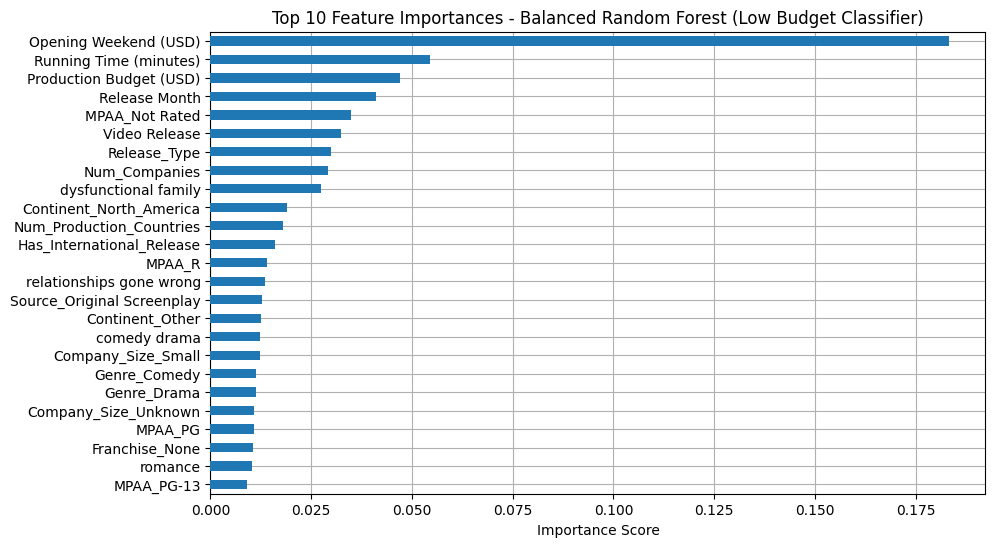

In [ ]:
importances = brf_low.feature_importances_
feature_names = X_low_class.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.head(25).plot(kind='barh', zorder=3)
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances - Balanced Random Forest (Low Budget Classifier)')
plt.grid(True, zorder=0)
plt.show()


Model 3 – Random Forest – Important Features

Prediction by Month

Release Month
1     3.275106e+07
2     4.386658e+07
3     4.889538e+07
4     4.500723e+07
5     7.742934e+07
6     7.937991e+07
7     7.012746e+07
8     3.605707e+07
9     2.849913e+07
10    3.392024e+07
11    6.284692e+07
12    7.100327e+07
Name: Domestic Gross (USD), dtype: float64


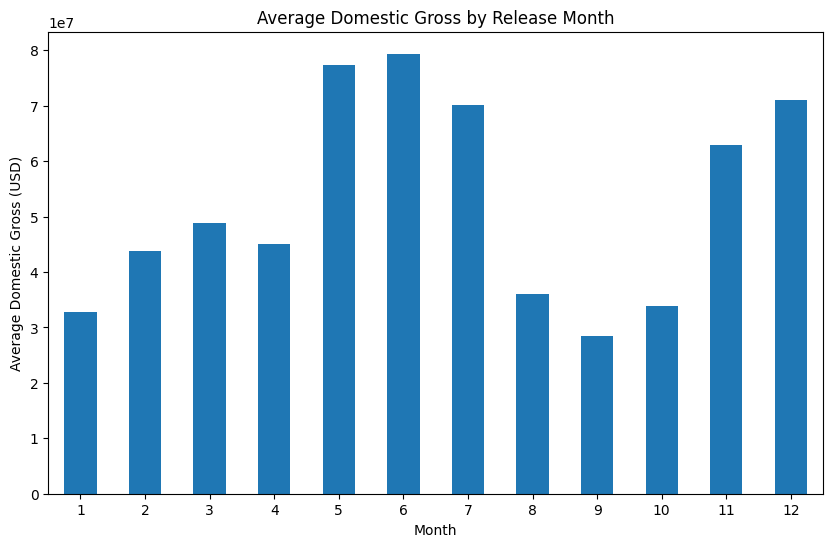

In [ ]:
df['Release Date'] = pd.to_datetime(df['Release Date'])


df['Release Month'] = df['Release Date'].dt.month


monthly_predictions = df.groupby('Release Month')['Domestic Gross (USD)'].mean()

print(monthly_predictions)


plt.figure(figsize=(10, 6))
monthly_predictions.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Domestic Gross (USD)')
plt.title('Average Domestic Gross by Release Month')
plt.xticks(rotation=0)
plt.show()


Running Time Category
Short        3.671351e+07
Medium       4.110546e+07
Long         8.982360e+07
Very Long    1.514046e+08
Name: Domestic Gross (USD), dtype: float64


<ipython-input-39-b6adbe0d629e>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_predictions = df.groupby('Running Time Category')['Domestic Gross (USD)'].mean()


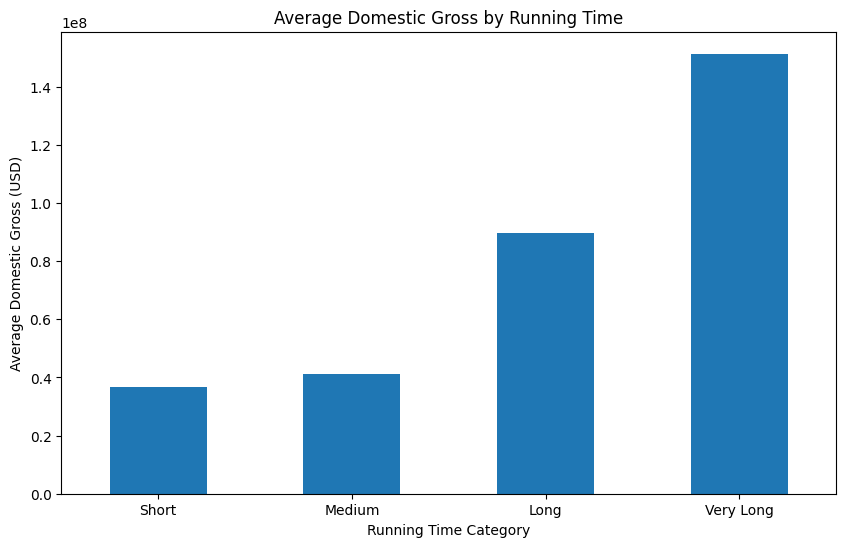

In [ ]:
df['Running Time (minutes)'] = pd.to_numeric(df['Running Time (minutes)'], errors='coerce')


bins = [0, 90, 120, 150, float('inf')]
labels = ['Short', 'Medium', 'Long', 'Very Long']
df['Running Time Category'] = pd.cut(df['Running Time (minutes)'], bins=bins, labels=labels)


runtime_predictions = df.groupby('Running Time Category')['Domestic Gross (USD)'].mean()


print(runtime_predictions)


plt.figure(figsize=(10, 6))
runtime_predictions.plot(kind='bar')
plt.xlabel('Running Time Category')
plt.ylabel('Average Domestic Gross (USD)')
plt.title('Average Domestic Gross by Running Time')
plt.xticks(rotation=0)
plt.show()

#Model 4 – XG Boost Regression – Domestic Gross (USD)

Drop Rare Columns

Model 4 - XG Boost

In [ ]:
from xgboost import XGBRegressor

budget_values = X_cleaned['Production Budget (USD)'].values


X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y, test_size=0.2, stratify=None, random_state=42
)

xgb_reg = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    reg_alpha=1,
    reg_lambda=1
)

xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost Regression → Test R²: {r2_xgb:.3f}, Test RMSE: {rmse_xgb:.2f}")


XGBoost Regression → Test R²: 0.861, Test RMSE: 33097118.64


In [ ]:
# 1. Save budget column BEFORE scaling
budget_values = X_cleaned['Production Budget (USD)'].values

# 2. Remove budget from features to avoid scaling it
X_features_only = X_cleaned.drop(columns=['Production Budget (USD)'])

# 3. Scale the rest of the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features_only)

# 4. Train/test split for both X and budget
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=None, random_state=42
)

budget_train, budget_test = train_test_split(
    budget_values, test_size=0.2, stratify=None, random_state=42
)

# 5. Train XGBoost regressor as usual
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    reg_alpha=1,
    reg_lambda=1
)
xgb_reg.fit(X_train, y_train)
y_pred_revenue_xgb = xgb_reg.predict(X_test)


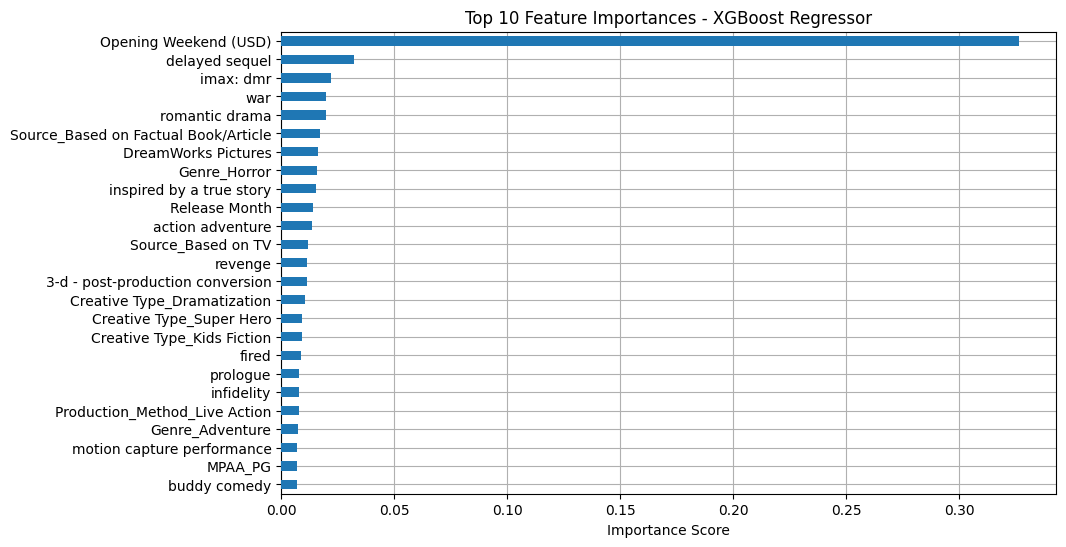

In [ ]:
feature_names = X_features_only.columns
importances = xgb_reg.feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.head(25).plot(kind='barh', zorder=3)
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances - XGBoost Regressor')
plt.grid(True, zorder=0)
plt.show()


#Emsemble Model –XG Boost + Balance Random Forest

In [ ]:
success_threshold = 1.725


y_pred_revenue_xgb = xgb_reg.predict(X_test)


y_proba_xgb = (y_pred_revenue_xgb >= success_threshold * budget_test).astype(int)


y_proba_brf = brf_clf.predict_proba(X_test)[:, 1]


X_meta = np.column_stack((y_proba_brf, y_proba_xgb))


meta_model = LogisticRegression()
meta_model.fit(X_meta, y_test)


final_preds = meta_model.predict(X_meta)
final_probs = meta_model.predict_proba(X_meta)[:, 1]

print("Classification Report (Ensemble):")
print(classification_report(y_test, final_preds))
print(f"Test AUC (Ensemble): {roc_auc_score(y_test, final_probs):.3f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ValueError: X has 148 features, but StandardScaler is expecting 478 features as input.

In [ ]:
brf_importances = brf_clf.feature_importances_
brf_feature_names = X_features_only.columns


feat_imp = pd.Series(brf_importances, index=brf_feature_names).sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
feat_imp.plot(kind='barh', zorder=3)
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 20 Feature Importances - Balanced Random Forest (Success Prediction)")
plt.tight_layout()
plt.grid(True)
plt.show()

ValueError: Length of values (158) does not match length of index (148)

#Bad Models

(Bad Model) – Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

feature_cols = df.select_dtypes(include=[np.number]).columns.drop(['Domestic Gross (USD)', 'Unnamed: 0'])
X = df[feature_cols]
y = df['successful']

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_imp = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imp)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=42
)

rf_clf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)

print(classification_report(y_test, y_pred_rf))
print("Test AUC:", roc_auc_score(y_test, y_proba, multi_class='ovr'))


              precision    recall  f1-score   support

       False       0.82      0.98      0.89       613
        True       0.88      0.43      0.58       230

    accuracy                           0.83       843
   macro avg       0.85      0.70      0.73       843
weighted avg       0.84      0.83      0.81       843

Test AUC: 0.5007731044754947


#Profit Curve

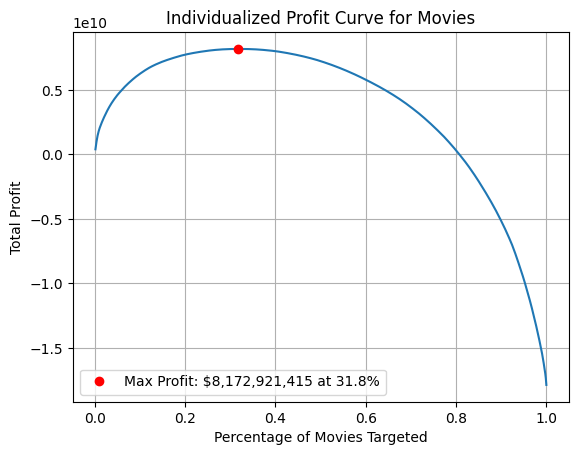

In [ ]:
individual_profits = []
for i in range(len(X_test)):
    predicted_revenue = grid_reg.predict(X_test_scaled[[i]])[0]

    budget = budget_test[i]
    probability_of_success = brf_clf.predict_proba(X_test[i].reshape(1, -1))[0, 1]

    profit = (probability_of_success * predicted_revenue) - budget
    individual_profits.append(profit)

sorted_indices = np.argsort(individual_profits)[::-1]

x_values = []
y_values = []
max_profit = 0
max_profit_percentage = 0


for i in range(len(X_test)):
  num_targeted = i + 1
  targeted_indices = sorted_indices[:num_targeted]

  total_profit = sum(individual_profits[j] for j in targeted_indices)

  percentage_targeted = num_targeted / len(X_test)
  x_values.append(percentage_targeted)
  y_values.append(total_profit)

  if total_profit > max_profit:
      max_profit = total_profit
      max_profit_percentage = percentage_targeted

plt.plot(x_values, y_values)
plt.plot(max_profit_percentage, max_profit, 'ro', label=f'Max Profit: ${max_profit:,.0f} at {max_profit_percentage*100:.1f}%')
plt.xlabel("Percentage of Movies Targeted")
plt.ylabel("Total Profit")
plt.title("Individualized Profit Curve for Movies")
plt.legend()
plt.grid(True)
plt.show()
